## Class 7 Agenda:
  * **Decision Trees: Regression Trees**
  * **What happens when a single tree is grown too deep?**
  * **Decision Trees: Classification Trees**
  * **Why Have Ensembles?**
  * **Ensembles make excellent machine learning models**
  * **Ensembles of Decision Trees: Random Forests**

In order to use several state-of-the-art machine learning methods, we need to be able to understand their core component: decision trees.

Decision trees, like logistic and linear regression in lesson 5 and 6, have been used commonly for machine learning tasks for several decades. These models are fairly easy to understand and and are the basis of the state-of-the-art model that we will build up to today (Random Forests).

Decision trees are especially interesting because they approach the machine learning problem in a way that is quite different from the linear methods we've used so far.

Lets get all of the imports out of the way for the packages we will be working with today:

In [1]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
## If you don't have pydotplus run these commands in terminal
pip install pydotplus

## Decision Trees
Let's start with a simple set of data you would like to classify into groups. How would you do so? One potential approach is by defining certain rules that allow you to split the data in the best location. For example, if the person's age is below 21, they would be classified as a minor, else they are an adult. Now you could break this out further into smaller groups, like adolescent (13-18), young adult (20-35), etc. This type of logic is the basic fundamental concept behind decision trees and branching. 

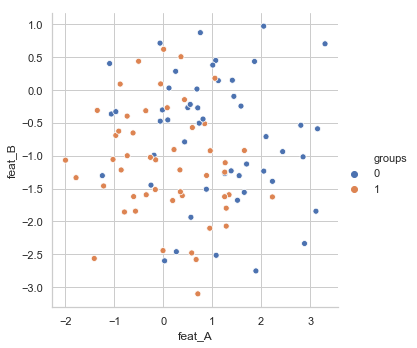

In [36]:
#Data Generation
AB, response = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-2,2))

data = {'feat_A':[],'feat_B':[],'groups':[]}
for i in AB:
    data['feat_A'].append(i[0])
    data['feat_B'].append(i[1])
    data['groups'].append(response[len(data['feat_A'])-1])
data = pd.DataFrame(data)

sns.relplot(data=data, x='feat_A',y='feat_B', hue='groups')

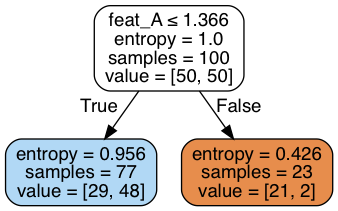

In [37]:
#One Deep
X_feat = data[['feat_A','feat_B']]
y = data.groups
t = DecisionTreeClassifier(max_depth=1,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


Entropy can be defined as a measure of homogeneity of a group where at $entropy=1$ you have an even mixture of observations and at $entropy=0$ you have a completely pure class. We won't dive to deep into the mathematics, but it can be mathematically expressed as $$entropy=\sum_{i=1}^n(-p_ilog_2(p_i))$$

Text(0,0.5,'feat_B')

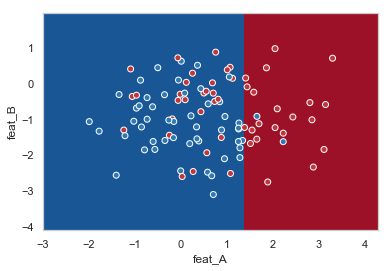

In [38]:
#One Deep Decision Surface
x_min, x_max = data['feat_A'].min()-1, data['feat_A'].max()+1
y_min, y_max = data['feat_B'].min()-1, data['feat_B'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=data['feat_A'],y=data['feat_B'],c=data['groups'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('feat_A')
plt.ylabel('feat_B')

Now, to get more precision, we can increase the level of depth.

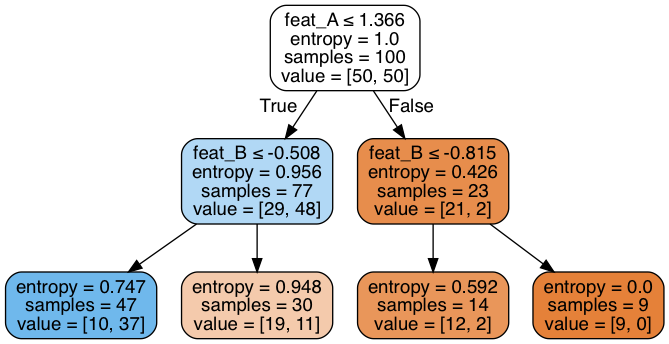

In [39]:
#Two Deep
t2 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
t2.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t2, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Text(0,0.5,'feat_B')

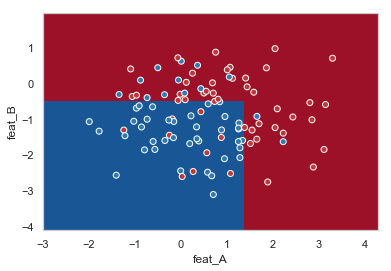

In [40]:
#Two Deep Decision Surface
x_min, x_max = data['feat_A'].min()-1, data['feat_A'].max()+1
y_min, y_max = data['feat_B'].min()-1, data['feat_B'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=data['feat_A'],y=data['feat_B'],c=data['groups'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('feat_A')
plt.ylabel('feat_B')

Text(0,0.5,'feat_B')

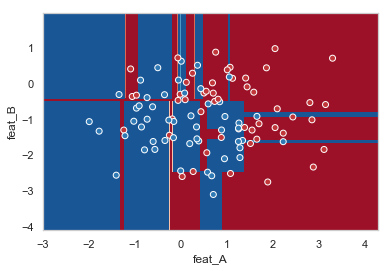

In [41]:
#Very Deep
t15 = DecisionTreeClassifier(max_depth=15,criterion='entropy')
t15.fit(X_feat,y)
x_min, x_max = data['feat_A'].min()-1, data['feat_A'].max()+1
y_min, y_max = data['feat_B'].min()-1, data['feat_B'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t15.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=data['feat_A'],y=data['feat_B'],c=data['groups'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('feat_A')
plt.ylabel('feat_B')

Though we may increase the level of accuracy we can achieve (on our train data), what happens is that this is no longer fitting the general trends of the data, rather it is modeling the idiosyncrancries of our dataset. If we are to run a split and then test, we can find what the optimal level of depth is.

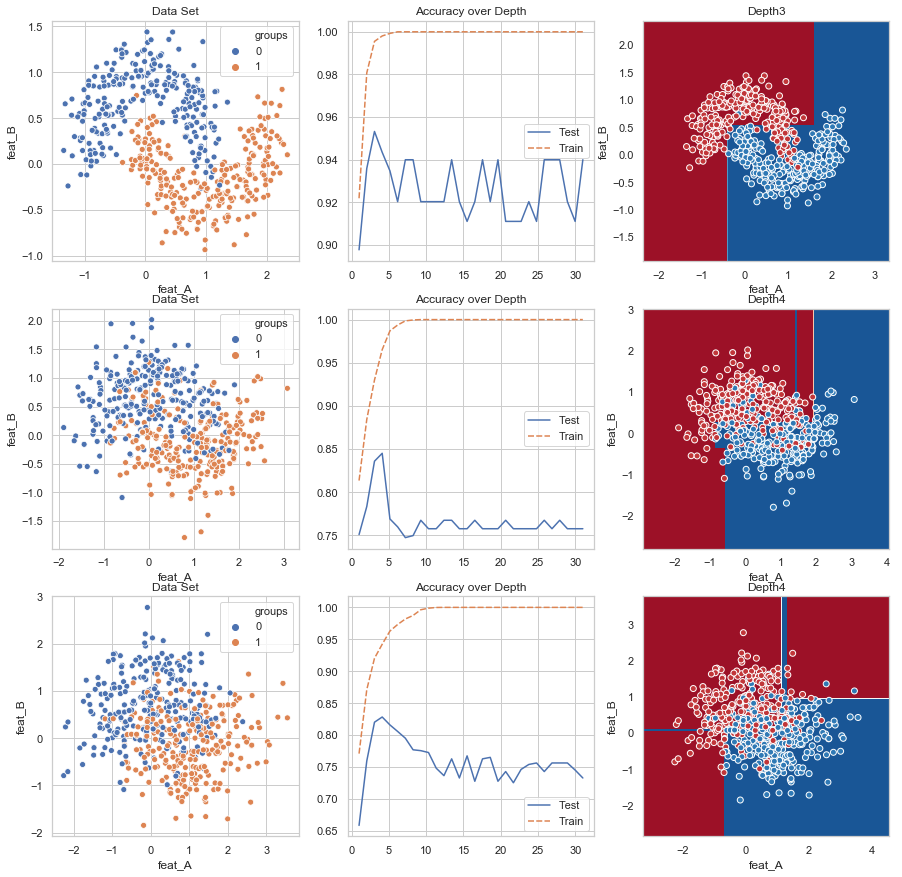

In [42]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(15,15))

for j in range(3):
    #Data Generation
    AB, response = datasets.make_moons(n_samples=500,noise=0.2*(j+1))

    data = {'feat_A':[],'feat_B':[],'groups':[]}
    for i in AB:
        data['feat_A'].append(i[0])
        data['feat_B'].append(i[1])
        data['groups'].append(response[len(data['feat_A'])-1])
    data = pd.DataFrame(data)

    xx, yy = np.meshgrid(np.arange(data['feat_A'].min()-1, data['feat_A'].max()+1, .01),
                         np.arange(data['feat_B'].min()-1, data['feat_B'].max()+1, .01))

    #Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(data[['feat_A','feat_B']], data['groups'], test_size=0.2)

    #Predictions
    test_accuracy = []
    train_accuracy = []
    for i in range(30):
        t = DecisionTreeClassifier(max_depth=i+1,criterion='entropy')
        t.fit(X_train,y_train)
        train = cross_validate(t,X=X_test,y=y_test,scoring='roc_auc',
                               cv=3,return_train_score=True)
        test_accuracy.append(sum(train['test_score'])/len(train['test_score']))
        train_accuracy.append(sum(train['train_score'])/len(train['train_score']))
    accs = pd.DataFrame({'Test':test_accuracy, 'Train':train_accuracy}).set_index(np.linspace(1,31,30))

    #Create Plots  
    sns.scatterplot(data=data, x='feat_A',y='feat_B', hue='groups',ax=axs[j,0]).set(title='Data Set')
    sns.lineplot(data=accs,ax=axs[j,1]).set(title='Accuracy over Depth')

    #Plot Contour
    bestDepth = test_accuracy.index(max(test_accuracy))
    t = DecisionTreeClassifier(max_depth=bestDepth+1,criterion='entropy')
    t.fit(X_train,y_train)
    Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    axs[j,2].contourf(xx, yy, Z, cmap='RdBu')
    axs[j,2].scatter(x=data['feat_A'],y=data['feat_B'],c=data['groups'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
    axs[j,2].set(xlabel='feat_A',ylabel='feat_B',title='Depth'+str(bestDepth+1))

You're not required to shoot in the dark as it come to customization of your tree. There exists something called a hyperparameter. There are certain inputs you give your model that are not driven by the data - rather selected explicitly. In the case of the hyperparameter $C=\frac{1}{\lambda}$ we tune the level of punishment we give for complexity. This type of change results in a different model for each value we give. In the case of a decision tree, we have the following hyperparameters:

1) **max_depth**: This is what we see as a the maximum number of layers to go down in the tree, i.e. max splits

2) **min_samples_split**: The minimum number or ratio of samples required to have a split, default = 2

3) **min_samples_leaf**: The minimum number of samples in a leaf (i.e. end point), default = 1

4) **max_features**: The maximum number of features to include, default = unlimited

5) **max_leaf_nodes**: The maximum number of leafs allowed, default = unlimited

6) **criterion**: 'gini' or 'entropy' (Impurity or Information Gain)

There are no hard rules as to what works best - much of this is heavily dependent on the size and quality of your data. For example with millions of data points, you likely don't have a need for leafs with only one observation. Likewise, for small datasets, you will likely find some gain from having that be allowed. This part of model creation is more art than science and requires experimentation.

## Tuning the Hyperparameters

There is such a large number of tunable variables, we would like to develop a way to analyze the results of our changes to these, and eventually develop a programmatic method for evaluating our success. We will find that the process can be automated to an extent, but as it comes to the complexity accuracy tradeoff, it will become a game of experience and feeling.

Let's start by considering only max_depth.

In [2]:
#Generate Data with 4 features and 1 response
ABCD, response = datasets.make_blobs(n_samples=500, centers=2,
                                     n_features=4, center_box=(-2,2))

data = {'feat_A':[],'feat_B':[],'feat_C':[],'feat_D':[],'response':[]}
for i in ABCD:
    data['feat_A'].append(i[0])
    data['feat_B'].append(i[1])
    data['feat_C'].append(i[2])
    data['feat_D'].append(i[3])
    data['response'].append(response[len(data['feat_A'])-1])
data = pd.DataFrame(data)

# create features and response for model
X_feat = data[['feat_A','feat_B','feat_C','feat_D']]
y = data.response

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1       0.89
2       0.91
3       0.91
4       0.91
5       0.89
10      0.87
15      0.88
20      0.87
25      0.87
30      0.87


From this, we can quickly see how our data is behaving as we increase the depth of the trees. One thing we might also be interested in doing is evaluating this as a cross-validation.

## What is Cross-Validation? 
When you take away data for training and testing, there can be some leakage of information into the model through the testing period. In other words, by using the same data as a testing set, it is possible that there will be some impact on the model based on the repeated testing. As such, by splitting in $n$ groups and training on $n-1$ groups, testing on the other, you can find an average performance that is a more honest and accurate reflection of how the model will perform in reality.

![cross validation](./images/cross_validation.png)

It is very easy to execute this type of process using `cross_val_score` in SKLearn.

In [3]:
#Iterate over different depths
depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    accs.append(cross_val_score(dtc,X_feat,y,cv=5).mean())
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1      0.886
2      0.906
3      0.948
4      0.938
5      0.924
10     0.910
15     0.906
20     0.910
25     0.912
30     0.906


In the situation that we would like to evaluate more than just the depth of the tree, for example, also the min_samples_leaf, we can nest some for loops to create this behaviors. Let's see.

In [4]:
#Use train_test_split on created data
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
leafs = [10,20,30,40,50,60]
accs = pd.DataFrame({'Depth':[],'Leaf Size':[],'Accuracy':[]})
for i in depths:
    for j in leafs:
        dtc = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j)
        accs = accs.append({'Depth':i,'Leaf Size':j,
                     'Accuracy':cross_val_score(dtc,X_feat,y,cv=5).mean()},ignore_index=True)
    
print('Scores:\n',accs.sort_values('Accuracy',ascending=False))

Scores:
     Accuracy  Depth  Leaf Size
30     0.948   10.0       10.0
24     0.948    5.0       10.0
18     0.948    4.0       10.0
36     0.948   15.0       10.0
42     0.948   20.0       10.0
12     0.948    3.0       10.0
48     0.948   25.0       10.0
54     0.948   30.0       10.0
25     0.906    5.0       20.0
49     0.906   25.0       20.0
37     0.906   15.0       20.0
13     0.906    3.0       20.0
43     0.906   20.0       20.0
55     0.906   30.0       20.0
31     0.906   10.0       20.0
19     0.906    4.0       20.0
6      0.904    2.0       10.0
7      0.892    2.0       20.0
33     0.886   10.0       40.0
35     0.886   10.0       60.0
45     0.886   20.0       40.0
39     0.886   15.0       40.0
41     0.886   15.0       60.0
29     0.886    5.0       60.0
47     0.886   20.0       60.0
51     0.886   25.0       40.0
53     0.886   25.0       60.0
57     0.886   30.0       40.0
1      0.886    1.0       20.0
0      0.886    1.0       10.0
59     0.886   30.0       60.0

We can continue to do this sort of methodology with $n$ nested for-loops for $n$ hyperparameters - but who has time for that. SKLearn has an in built feature to do exactly this sort of analysis. This method, called GridSearchCV does more or less exactly what we have been exploring, but with even more features. The way you pass the sets of values you would like to evaluate over is very similar to what we have done so far. Just like in doing our decision trees, we can see that the relationship between the number of hyperparameters and the computation time is exponential.

The time to perform these computations has the following form where $\mid P_k\mid$ is the length of the list of potential values for each parameter:

$$Computation\ Time=\left(\prod_{k=1}^{n}\mid P_k\mid\right)\times CV,\ n\ parameters$$

Let's do the same model as above, but with this new technique.

In [5]:
dtc = DecisionTreeClassifier(criterion='entropy') #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'min_samples_leaf':[10,20,30,40,50,60]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(20)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished


,mean_test_score,param_max_depth,param_min_samples_leaf
0,0.940,10,10
1,0.940,25,10
2,0.940,4,10
3,0.940,15,10
4,0.940,3,10
5,0.940,20,10
6,0.940,5,10
7,0.940,30,10
8,0.896,20,20
9,0.896,25,20


It's important to note that this final method to declare scores uses a powerful tool called a regular expression where you can match text based on certain conditions. In our case, we are saying to match anything that starts with 'param_' and has at least one character after that, or something that is exactly 'mean_test_score'. What this gives us is each of our hyperparameters (which are now param_name).

### Exercise Time
Modify the code that we used to analyze two hyperparameters, and now also include the 'criterion' hyperparameter. Please consult the documentation for details on its possible values. Then print out exactly the same type of table as above with this new column

It might be tempting to simply say, we want to maximize our accuracy so we choose the best performing model. Now, in some cases this may be what you end up doing, but more often, you will select a model that strikes a balance between complexity and accuracy.

Let's discuss a theoretical example. If you were to have a model that is evaluating max_depth and min_samples_leaf, what you would like to do is predict accurately and simply to avoid overfitting. One method for this is to do a cost-benefit analysis on the $\Delta complexity\ $to$\ \Delta accuracy$ relationship.

If our output from the grid search were to give us something like: (max_depth,min_samples_leaf,accuracy)=(10,50,.8),(15,50,.802) we must make a decision of which one is better. In thinking of this in terms of the above relationship, we have a percentage change of 50% in max_depth, with a resulting percentage change of 0.25% in accuracy. It should be a relatively safe bet that this change in accuracy would likely fall within a CI of accuracy based on our cross validation, or at least is so insignificant (not in the statistical way, but philosophical way) that including 50% more complexity is not worth it.

Based on this, let's go ahead and try to select what we think the best model might be out of scores. Note, there is no right answer to this question (though I would argue there are wrong answers).

In [ ]:
scores.head(20)

### Regression trees

You can also use decision trees to predict numbers rather than categories. We are going to motivate this exploration of individual decision trees by looking at another dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test).

This dataset is a collection of measurements of compositional properties of concrete and their effect on the concrete's durability.

The dataset is composed of 7 input measurement features (kilograms per meter cubed of concrete):
  * Cement
  * Slag	
  * Fly ash	
  * Water	
  * SP	
  * Coarse Aggr.	
  * Fine Aggr.
  
And 3 output measurements:
  * SLUMP (cm)	
  * FLOW (cm)	
  * 28-day Compressive Strength (Mpa)

Lets get the data directly off the web this time:

In [6]:
cement_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data",index_col=0)
#replace spaces and periods in column names with underscores
cement_data.columns = cement_data.columns.str.lower()\
                                         .str.replace(" ","_")\
                                         .str.replace(".","")\
                                         .str.replace("(","_")\
                                         .str.replace(")","_")

In [7]:
cement_data.head()

,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump_cm_,flow_cm_,compressive_strength__28-day__mpa_
No,,,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


We are going to construct a model that predicts the last column (`compressive_strength`) using the 7 input columns.

We are also going to remap the `compressive_strength` column to a few bins so that we can map ranges of output values to colors:

In [8]:
X,y = cement_data.iloc[:,:7],cement_data.iloc[:,-1]
feature_names_cem = X.columns.tolist()
target_name = cement_data.columns.tolist()[-1]
cement_data["compressive_strength_bins"] = pd.cut(cement_data[target_name],5) #create 5 equally-sized bins

Let's visualize our inputs and outputs in a scatter matrix to get a feel for the data:

/Users/Nicole/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


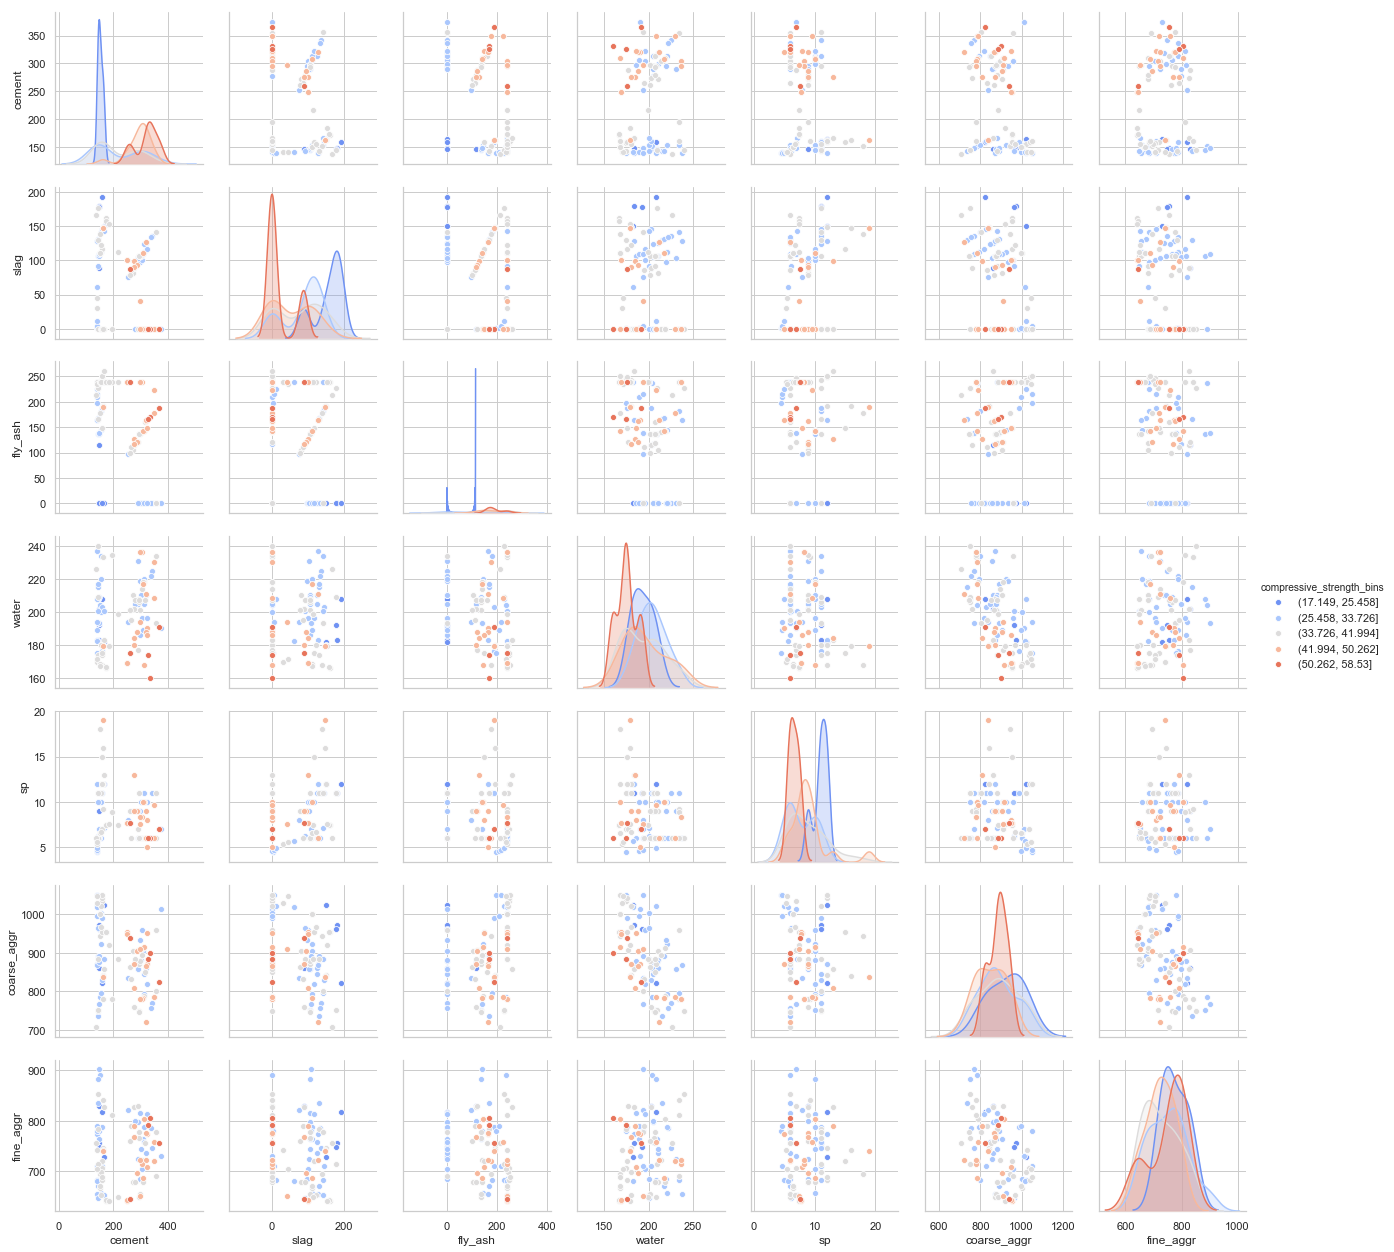

In [9]:
sns.pairplot(cement_data[feature_names_cem+['compressive_strength_bins']],
             hue="compressive_strength_bins",palette='coolwarm')

Now let's investigate one specific pair of columns that look like they are separable in terms of those bins, `cement`, and `fly_ash`:

/Users/Nicole/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


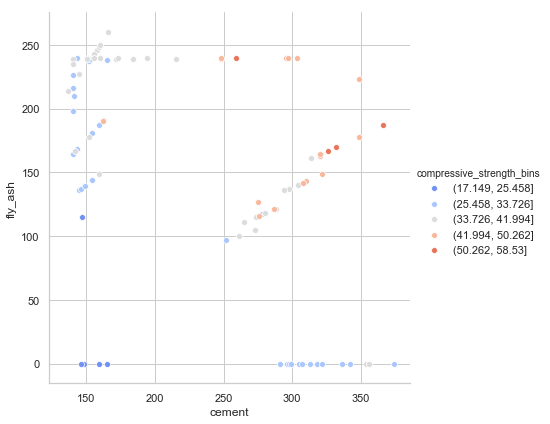

In [10]:
sns.pairplot(cement_data, x_vars=['cement'], y_vars=["fly_ash"],
             hue='compressive_strength_bins',size=6,palette="coolwarm")

Lets build a model using just these two features that can give reasonable predictions on `compressive_strength`. We will build it as follows: 
  * Segment the whole space of `cement`/`fly_ash` possibilities into distinct regions
  * Use the **mean compressive_strength in each region** as the predicted `compressive_strength` for that combination of `cement` to `fly_ash` for future concrete samples.
  * Intuitively, we want to **maximize** the similarity (or "homogeneity") of `compressive_strength` within a given region, and **minimize** the similarity of `compressive_strength` between regions. So, more similar colors within a region, distinct colors across regions.

We will follow some strict rules for segmenting the whole space:
  * You can only use **straight lines**
  * Your lines must either be **vertical or horizontal**.
  * Every line **stops** when it hits an existing line.

Before we build our model, lets generate train/test splits of our data:

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,
                                                 random_state=20)

Now lets build our model and check its test error (using **RMSE**):

In [12]:
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test))))

Decision Tree RMSE: 5.322294496412798


In [13]:
X_train.shape

(61, 7)

Lets visualize our decision tree:

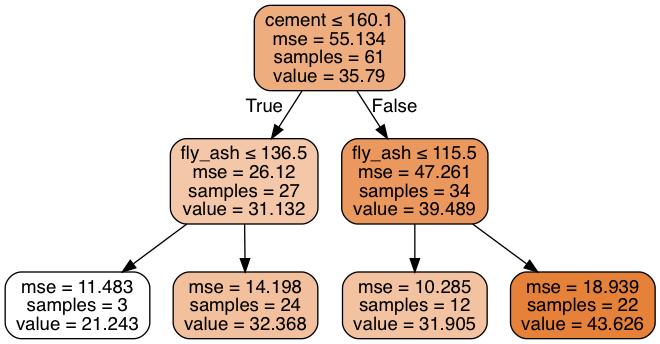

In [14]:
#This allows us to make a decision tree real fast directly in the notebook!
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Above is the decision tree created by sklearn and here is how you would read it:

- $R_1$: concrete with **less than or equal to 160.1 $kg/m^3$ of cement and fly ash less than or equal to 136.5 $kg/m^3$**, is predicted to have a mean compressive_strength of **21.24**
- $R_2$: concrete with **less than or equal to 160.1 $kg/m^3$ of cement and fly ash more than 136.5 $kg/m^3$**, is predicted to have a mean compressive_strength of **32.37**
- $R_3$: concrete with **more than 160.1 $kg/m^3$ of cement and fly ash less than or equal to 115.5 $kg/m^3$**, is predicted to have a mean compressive_strength of **31.91**
- $R_4$: concrete with **more than 160.1 $kg/m^3$ of cement and fly ash more than 115.5 $kg/m^3$**, is predicted to have a mean compressive_strength of **43.63**

These regions are used to make predictions on **out-of-sample data**. Thus, there are only 4 possible predictions! (Is this different from how **linear regression** makes predictions?):

In [15]:
np.unique(decision_tree.predict(X_test))

array([21.24333333, 31.905     , 32.36833333, 43.62636364])

### Exercise Time!!
  * Build a decision tree model to predict slump given the input features.
  * What is the test set RMSE?

Lets look at the tree again:

In [ ]:
Image(graph.create_png())

The first split is **cement <= 160.1**, thus that split goes at the top of the tree. When a splitting rule is **True**, you follow the left branch. When a splitting rule is **False**, you follow the right branch.

For concrete samples in the **left branch**, there is a further split on **fly_ash <= 136.5**, dividing the samples into 2 compressive_strength regions: 21.24 and 32.37.

For concrete samples in the **right branch**, there is a further split on **fly_ash <= 115.5**, dividing the samples into 2 more compressive_strength regions: 31.91 and 43.63.

**What does this tree tell you about the cement data?**
  * Cement is the most important factor determining compressive_strength, with lower cement concentration generally leading to lower compressive strength.
  * However, fly_ash is an important secondary characteristic, again showing that lower fly_ash concentration leads to lower compressive_strength.

### How does a computer build a regression tree?

**Ideal approach:** Consider every possible partition of the feature space (computationally infeasible)

**"Good enough" approach:** recursive binary splitting:
  * Begin at the top of the tree.
  * For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint such that the resulting tree has the lowest possible mean squared error (MSE). Make that split.
  * Examine the two resulting regions, and again make a **single split** (in one of the regions) to minimize the MSE.
  * Keep repeating the previous step until a **stopping criterion** is met:
    - maximum tree depth is reached (maximum number of splits required to arrive at a leaf, in our case it was 2)
    - minimum number of observations in a leaf (default is 2)

#### Exercise Time!!!
  * Generate a train/test graph like the one above for the slump model you built earlier. Do the curves look similar to those we just generated above?

In [21]:
X = cement_data[["cement","fly_ash"]]
y = cement_data["compressive_strength__28-day__mpa_"]

train_rmse,test_rmse = [],[]
for depth in range(1,11):
    ## generate and fit decision tree regressor model with train test split
    
       
    ## use model to predict y, return RMSE, append to train, test rmse lists


sns.mpl.pyplot.plot(range(1,11),train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(range(1,11),test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()    

IndentationError: expected an indented block (<ipython-input-21-4f2481228dab>, line 12)

### Evaluating Feature Importance

The way that we measure the importance of a given feature for a Regression Tree is by computing what is called the [gini importance/coefficient]() of each feature. This measures the normalized total reduction of error when including the given feature.

We can extract the feature importances of any trained tree by extracting its `feature_importances_` property:

In [25]:
# max_depth=3 was best, so fit a tree using that parameter
X = cement_data[["cement","fly_ash"]]
y = cement_data["compressive_strength__28-day__mpa_"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=1)
best_single_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [27]:
pd.DataFrame({'feature':["cement","fly_ash"], 'importance':best_single_tree.feature_importances_})

,feature,importance
0,cement,0.503728
1,fly_ash,0.496272


#### Exercise Time !!!
  * Examine the feature importances of your slump model. Are they the same as those above? Is the order of the features in terms of their importances the same?

### Understanding a tree diagram

Lets take a look at our best decision tree:

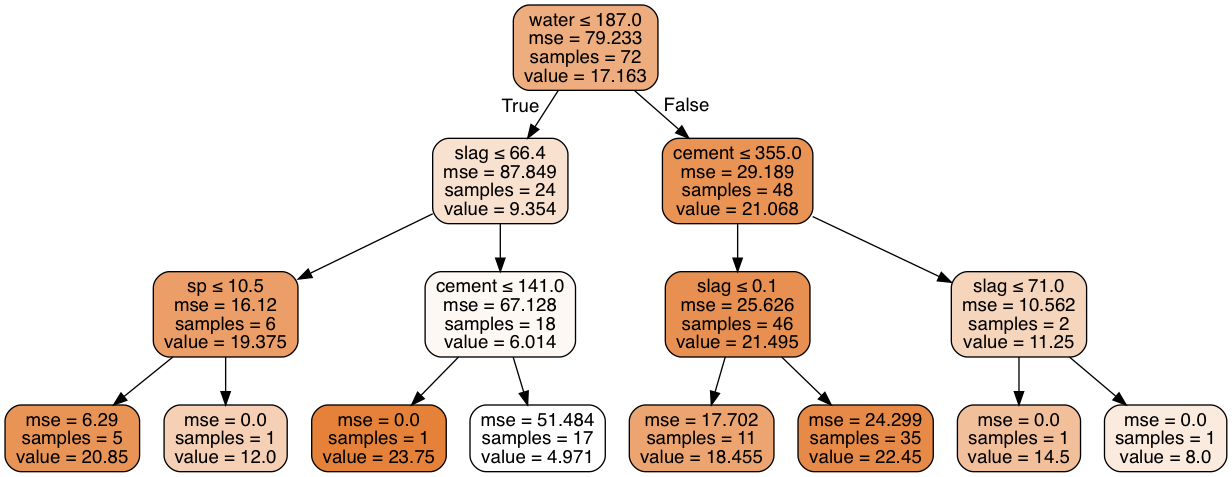

In [29]:
dot_data2 = StringIO()  
export_graphviz(dt, out_file=dot_data2,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph_best = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph_best.create_png())  

How to interpret the internal nodes:

- **samples:** number of observations in that node before splitting
- **mse:** MSE calculated by comparing the actual response values in that node against the mean response value in that node
- **rule:** rule used to split that node (go left if true, go right if false)

Reading the leaves (bottom parts of the tree):

- **samples:** number of observations in that node
- **value:** mean response value in that node
- **mse:** MSE calculated by comparing the actual response values in that node against "value"

### Making predictions for the testing data

**Question:** Using the tree diagram above, what predictions will the model make for each test sample observation?

In [30]:
# use fitted model to make predictions on testing data
y_pred = dt.predict(X_test)
np.unique(y_pred)

array([ 4.97058824, 12.        , 14.5       , 18.45454545, 20.85      ,
       22.45      ])

In [31]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

7.964526772802301

### Comparing regression trees and classification trees

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize Gini index (discussed below)|

## Comparing decision trees with other models
**Advantages of decision trees:**
  * Can be used for regression or classification
  - Can be displayed graphically
  - Highly interpretable
  - Can be specified as a series of rules, and more closely approximate human decision-making than other models
  - Prediction is fast
  - Features don't need scaling
  - Automatically learns feature interactions (they are non-linear models)
  - Tend to ignore irrelevant features (especially when there are lots of features)
  - Because decision trees are non-linear models they will outperform linear models if the relationship between features and response is highly non-linear
  
**Disadvantages of decision trees:**
  - Performance is (generally) not competitive with the best supervised learning methods
  - Can easily overfit the training data (tuning is required)
  - Small variations in the data can result in a completely different tree (they are high variance models)
  - Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
  - Don't tend to work well if the classes are highly unbalanced
  - Don't tend to work well with very small datasets

### Ensembles

Consider:
* instead of building a single model to solve a classification problem, 
* you created **five independent models**, 
* If you combined these models into an "ensemble" and used their **majority vote** as a prediction, 
* and each model was **correct about 70% of the time**. 
* *how often would the ensemble be correct?*

In [32]:
# set a seed for reproducibility
np.random.seed(1234)

# generate 5000 random numbers (between 0 and 1) for each model, representing 5000 observations
mod1 = np.random.rand(5000)
mod2 = np.random.rand(5000)
mod3 = np.random.rand(5000)
mod4 = np.random.rand(5000)
mod5 = np.random.rand(5000)

In [33]:
# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

In [34]:
# print the first 20 predictions from each model
print(preds1[:20])
print(preds2[:20])
print(preds3[:20])
print(preds4[:20])
print(preds5[:20])

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1]
[1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1]


In [35]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

# print the ensemble's first 20 predictions
print(ensemble_preds[:20])

[1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1]


In [36]:
# how accurate was each individual model?
print(preds1.mean())
print(preds2.mean())
print(preds3.mean())
print(preds4.mean())
print(preds5.mean())

0.6988
0.6988
0.7
0.7014
0.6982


In [37]:
# how accurate was the ensemble?
print(ensemble_preds.mean())

0.8364


**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform random guessing
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

**Note:** As you add more models to the voting process, the probability of error decreases, which is known as [Condorcet's Jury Theorem](http://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem).

### Random Forests as an Ensemble Method

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

Random Forests help solve this problem by using an ensemble of decision trees. 

  - When building each tree, each time a split is considered, a **random sample of _m_ features** is chosen as split candidates from the **full set of _p_ features**. The split is only allowed to use **one of those _m_ features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, *m* is typically chosen to be the square root of *p* (the total number of features).
    - For **regression**, *m* is typically chosen to be somewhere between *p*/3 and *p*.
    
Why do all of this fancy stuff?
  - Lets suppose there is **one very predictive feature** in the data set. When using a random sample of m features, we will be able to average out the effects of each feature compared to seeing that one feature used in every single tree that we run, aka high correlation between all the trees created. 
  - **Random Forests "decorrelate" the trees**, such that the averaging process reduces the variance of the resulting model.

### Random Forests vs. Single Tree

Let's look back at the cement slump test data and compare the test data performance across the 2 methods we've talked about so far:

In [38]:
#Our data
X_cem = cement_data[feature_names_cem]
y_cem = cement_data[target_name]
X_train,X_test,y_train,y_test = train_test_split(X_cem,y_cem,test_size=0.4)
#Single Tree
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=12)
best_single_tree.fit(X_train, y_train)
y_pred_single = best_single_tree.predict(X_test)

#Random forest of 500 trees
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=12)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_single)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Single Tree RMSE: 5.100489568150569
Random Forest RMSE: 3.7962715994888847


### Tuning Random Forests: # of trees and maximum features used

2 important parameters that should be tuned when creating a random forest model are:
  * The number of trees to grow (called **n_estimators** in scikit-learn)
  * The number of features that should be considered at each split (called **max_features** in scikit-learn)

Lets tune each feature separately below, starting with **n_estimators**:

In [47]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

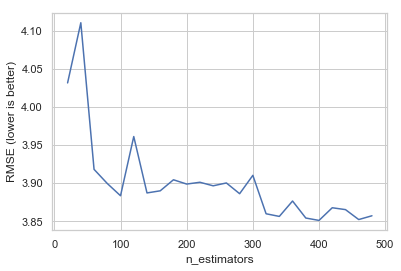

In [48]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

**n_estimators** should be a large enough value such that the error seems to be stable.

Now lets do the same thing with **max_features**:

In [55]:
# list of values to try for max_features
feature_range = range(1, len(feature_names_cem)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

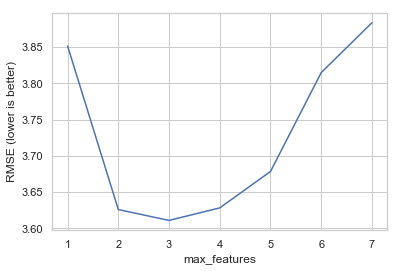

In [56]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

So it looks like using 3 features is best. Let's build the optimal classifier we can given what we know and see the overall performance on the test set:

In [58]:
rfreg_best = RandomForestRegressor(n_estimators=180, max_features=3, bootstrap=True, oob_score=True, random_state=123)
rfreg_best.fit(X_train,y_train)
preds = rfreg_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("Best RMSE:",rmse)

Best RMSE: 3.4770989837314277


And lets take a look at the feature importances:

In [59]:
# compute feature importances
pd.DataFrame({'feature':feature_names_cem, 
              'importance':rfreg_best.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
0,cement,0.333080
2,fly_ash,0.233502
1,slag,0.144005
3,water,0.126865
6,fine_aggr,0.065612
5,coarse_aggr,0.062321
4,sp,0.034615


#### Exercise Time
  * Build a Random Forest Regression Model to predict Flow using the concrete slump test dataset.
    * Use GridsearchCV to find the best model parameters
    * What is the test-set RMSE?
    * What are the feature importances?

In [60]:
#get data


#split into train/test


# generate random forest with grid search


#train random forests


#get rmse on test set
print("test error for slump: ")



test error for slump: 


In [62]:
# compute feature importances


### Comparing Random Forests with Single Decision Trees

**Advantages of Random Forests:**
  * Performance is competitive with the best supervised learning methods
  - Provides a more reliable estimate of feature importance
  - Allows you to estimate out-of-sample error without using train/test split or cross-validation
**Disadvantages of Random Forests:**
  - Less interpretable
  - Slower to train
  - Slower to predict

### Comparing Ensembles to Individual Models
**Advantages of ensembling:**
  - Increases predictive accuracy
  - Easy to get started (especially with Random Forests)

**Disadvantages of ensembling:**
  - Decreases interpretability
  - Takes longer to train/predict
  - More complex to automate and maintain
  - Sometimes marginal gains in accuracy may not be worth the added complexity